In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

In [2]:
Harr, Narr, qy_flow_arr = np.load('cgdata_19jan.npy')

In [3]:
np.genfromtxt('cgdata_19jan.txt', delimiter=';',dtype='str')

array(['Nsweeps = 3000', 'Tvec = np.linspace(0.05,1,20)',
       'Lvec = np.array([4,8,16])', 'Jvec = np.linspace(0,1.5,16)'],
      dtype='<U29')

In [4]:
# Take average over trajectory. Discard first Ntrans entries (transient)
#Nsweeps = 2000
#Tvec = np.linspace(0.01,1,20)
#Lvec = np.array([4,8,16])
#Jvec = np.linspace(0.1,1.5,15)
Nsweeps = 3000
Tvec = np.linspace(0.05,1,20)
Lvec = np.array([4,8,16])
Jvec = np.linspace(0,1.5,16)

Ntrans=1000
i = 2
Varr = qy_flow_arr[:,i,:,Ntrans:]/(Lvec[i]*np.linspace(Ntrans,Nsweeps,Nsweeps-Ntrans))
Earr = qy_flow_arr[:,i,:,Ntrans:]/(np.linspace(Ntrans,Nsweeps,Nsweeps-Ntrans))
Varr_mean = np.mean(Varr,axis=2)
Varr_std = np.std(Varr,axis=2)
Earr_mean = np.mean(Earr,axis=2)
Earr_std = np.std(Varr,axis=2)

<IPython.core.display.Javascript object>


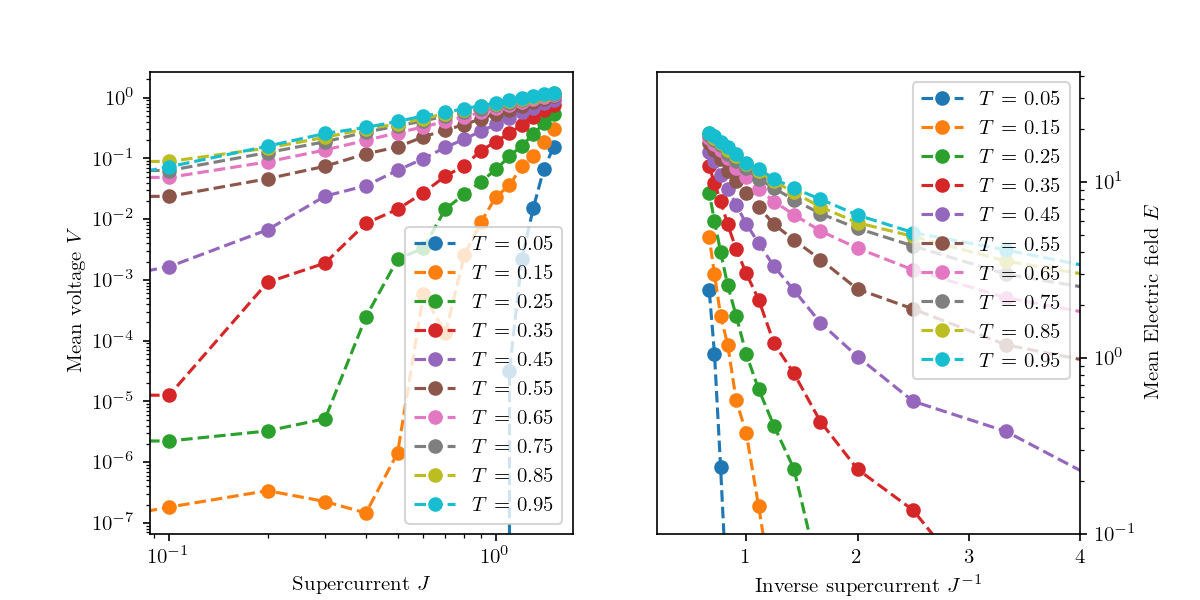

C:\Users\jonat\AppData\Local\Temp/ipykernel_8564/845421623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_8564/845421623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_8564/845421623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_8564/845421623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_8564/845421623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_8564/845421623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_8564/845421623.py:16: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppDa

In [10]:
fig, ax = plt.subplots(1,2,figsize=(8,4))
ax1,ax2 = ax
ax1.set_xscale("log", nonpositive='clip')
ax1.set_yscale("log", nonpositive='clip')
ax2.set_yscale("log", nonpositive='clip')

shift = 0
step = 2
for i,T in enumerate(Tvec[shift::step]):
    V = Varr_mean[:,shift+step*i]
    Verr = Varr_std[:,shift+step*i]
    J = Jvec
    ax1.plot(J,V, 'o--',label=f"$T$ = {np.round(T, 2)}")
    E = Earr_mean[:,shift+step*i]
    Eerr = Earr_std[:,shift+step*i]
    Jinv = 1/Jvec
    ax2.plot(Jinv,E, 'o--',label=f"$T$ = {np.round(T, 2)}")
ax1.legend()
ax1.set_xlabel('Supercurrent $J$')
ax1.set_ylabel('Mean voltage $V$')
ax2.set_ylim(bottom=.1) 
ax2.set_xlim(right=4) 
ax2.legend()
ax2.set_xlabel('Inverse supercurrent $J^{-1}$')
ax2.set_ylabel('Mean Electric field $E$')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
plt.savefig('iev_curve.pdf',bbox_inches='tight')

<IPython.core.display.Javascript object>


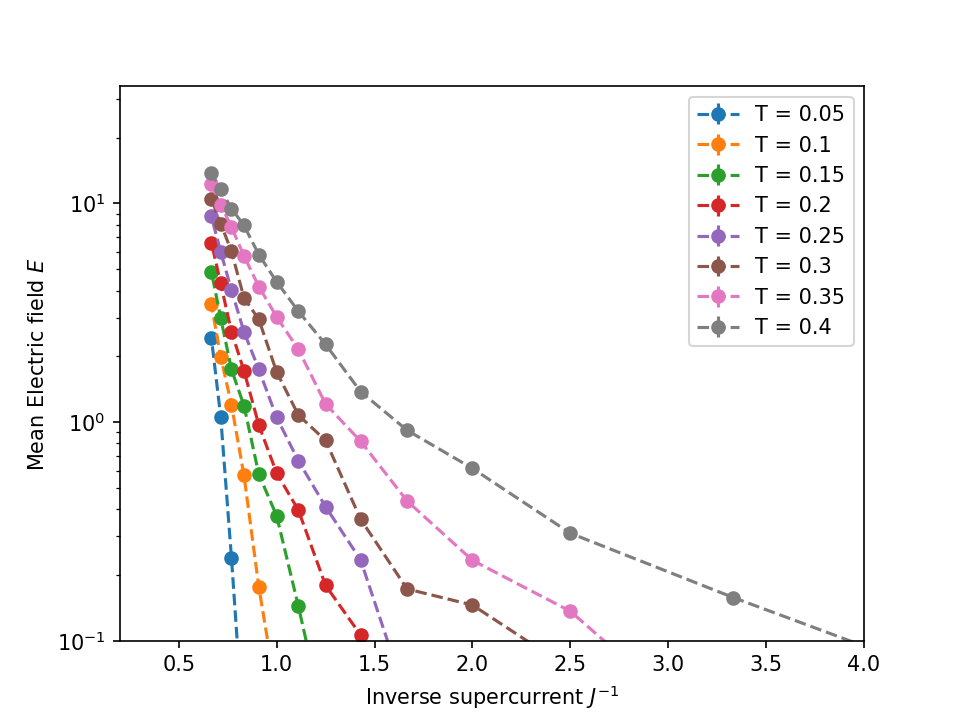

C:\Users\jonat\AppData\Local\Temp/ipykernel_11576/2972877407.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_11576/2972877407.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_11576/2972877407.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_11576/2972877407.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_11576/2972877407.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_11576/2972877407.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Users\jonat\AppData\Local\Temp/ipykernel_11576/2972877407.py:10: RuntimeWarning: divide by zero encountered in true_divide
  Jinv = 1/Jvec
C:\Use

Text(0, 0.5, 'Mean Electric field $E$')

In [167]:
fig, ax = plt.subplots(figsize)
ax.set_yscale("log", nonpositive='clip')

shift = 0
step = 1
stop = 8
for i,T in enumerate(Tvec[shift:stop:step]):
    E = Earr_mean[:,shift+step*i]
    Eerr = Earr_std[:,shift+step*i]
    Jinv = 1/Jvec
    ax.errorbar(Jinv,E, fmt='o--',yerr=Eerr,label=f"T = {np.round(T, 2)}")

ax.set_ylim(bottom=.1) 
ax.set_xlim(right=4) 
ax.legend()
ax.set_xlabel('Inverse supercurrent $J^{-1}$')
ax.set_ylabel('Mean Electric field $E$')
#plt.savefig('ie_curve_cropped3.jpg',bbox_inches='tight', dpi=400)

In [163]:
E.dtype

dtype('float64')

<IPython.core.display.Javascript object>


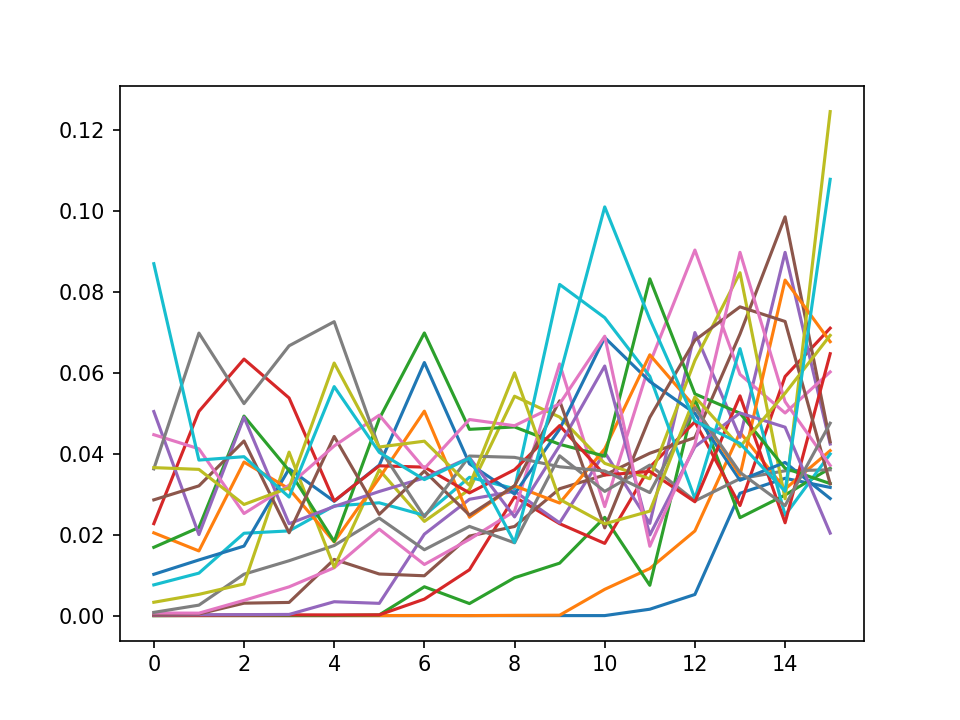

(16, 20)

In [117]:
Ntrans=1000
i = 2
Earr = qy_flow_arr[:,i,:,Ntrans:]/np.linspace(Ntrans,Nsweeps,Nsweeps-Ntrans)
E = np.std(Earr,axis=2)
plt.figure()
plt.plot(E)
E.shape

In [126]:
Varr_std[:,shift+step*i]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 9.87599635e-05,
       3.26597869e-04, 1.89025678e-03, 2.12191050e-03, 1.98066991e-03])